In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_csv('../../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_data.drop(['customerID'], axis=1, inplace=True)
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Preparando los datos

In [4]:
# cambiar TotalCharges a numerico
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce') # si hay error, se pone NaN

In [5]:
df_data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df_data.dropna(inplace=True)
df_data.shape

(7032, 20)

In [7]:
df_data.Churn[:5]

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [8]:
df_data.Churn = df_data.Churn.map({'Yes': 1, 'No': 0})
df_data.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [9]:
df_processed = df_data.copy()

## Manejo de varibles categoricas

In [10]:
df_processed = pd.get_dummies(df_processed)
df_processed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [11]:
df_processed.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

## Analisis de correlacion

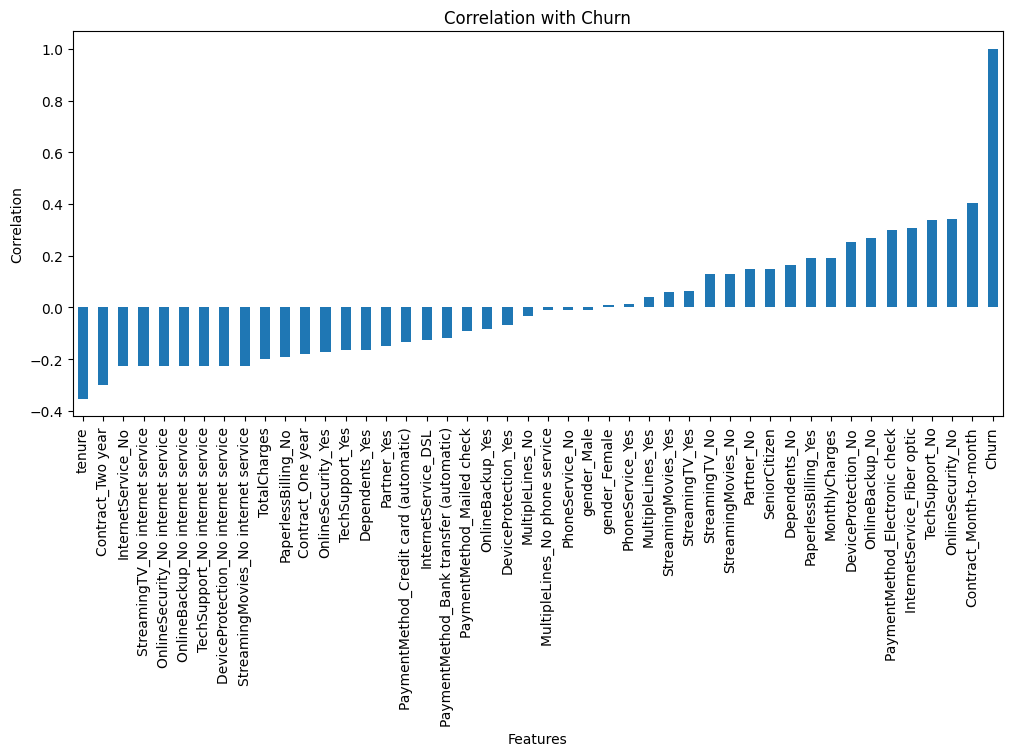

In [12]:
plt.figure(figsize=(12, 5))

df_processed.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.title('Correlation with Churn')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.show()

## Escalabilidad de los datos

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
df_processed_scaled = scaler.fit_transform(df_processed)

In [15]:
df_processed_scaled = pd.DataFrame(df_processed_scaled, columns=df_processed.columns)
df_processed_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Analisis Exploratorio de Datos

In [16]:
sns.set_style('darkgrid')

In [17]:
def plot_categorical(column):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.countplot(x=column, data=df_data, ax=ax, hue='Churn')
    ax.set_title(f'Churn by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    plt.show()

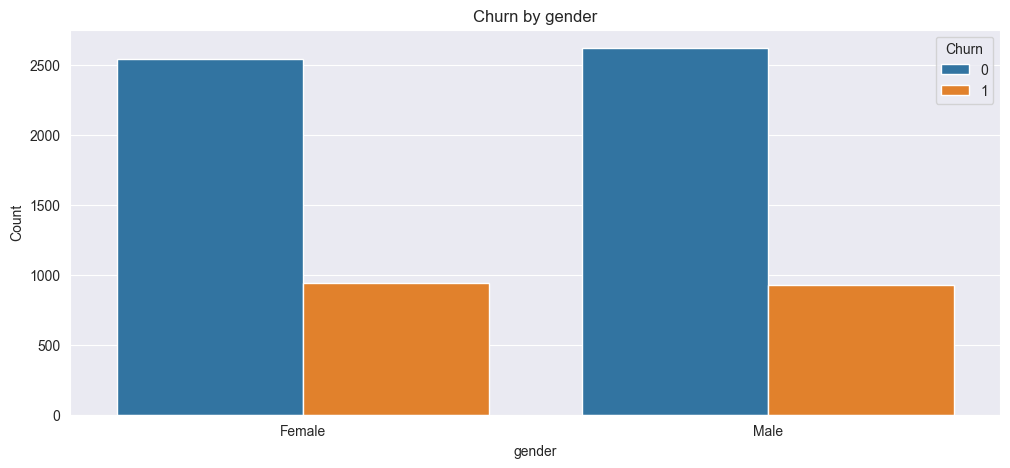

In [18]:
plot_categorical('gender')

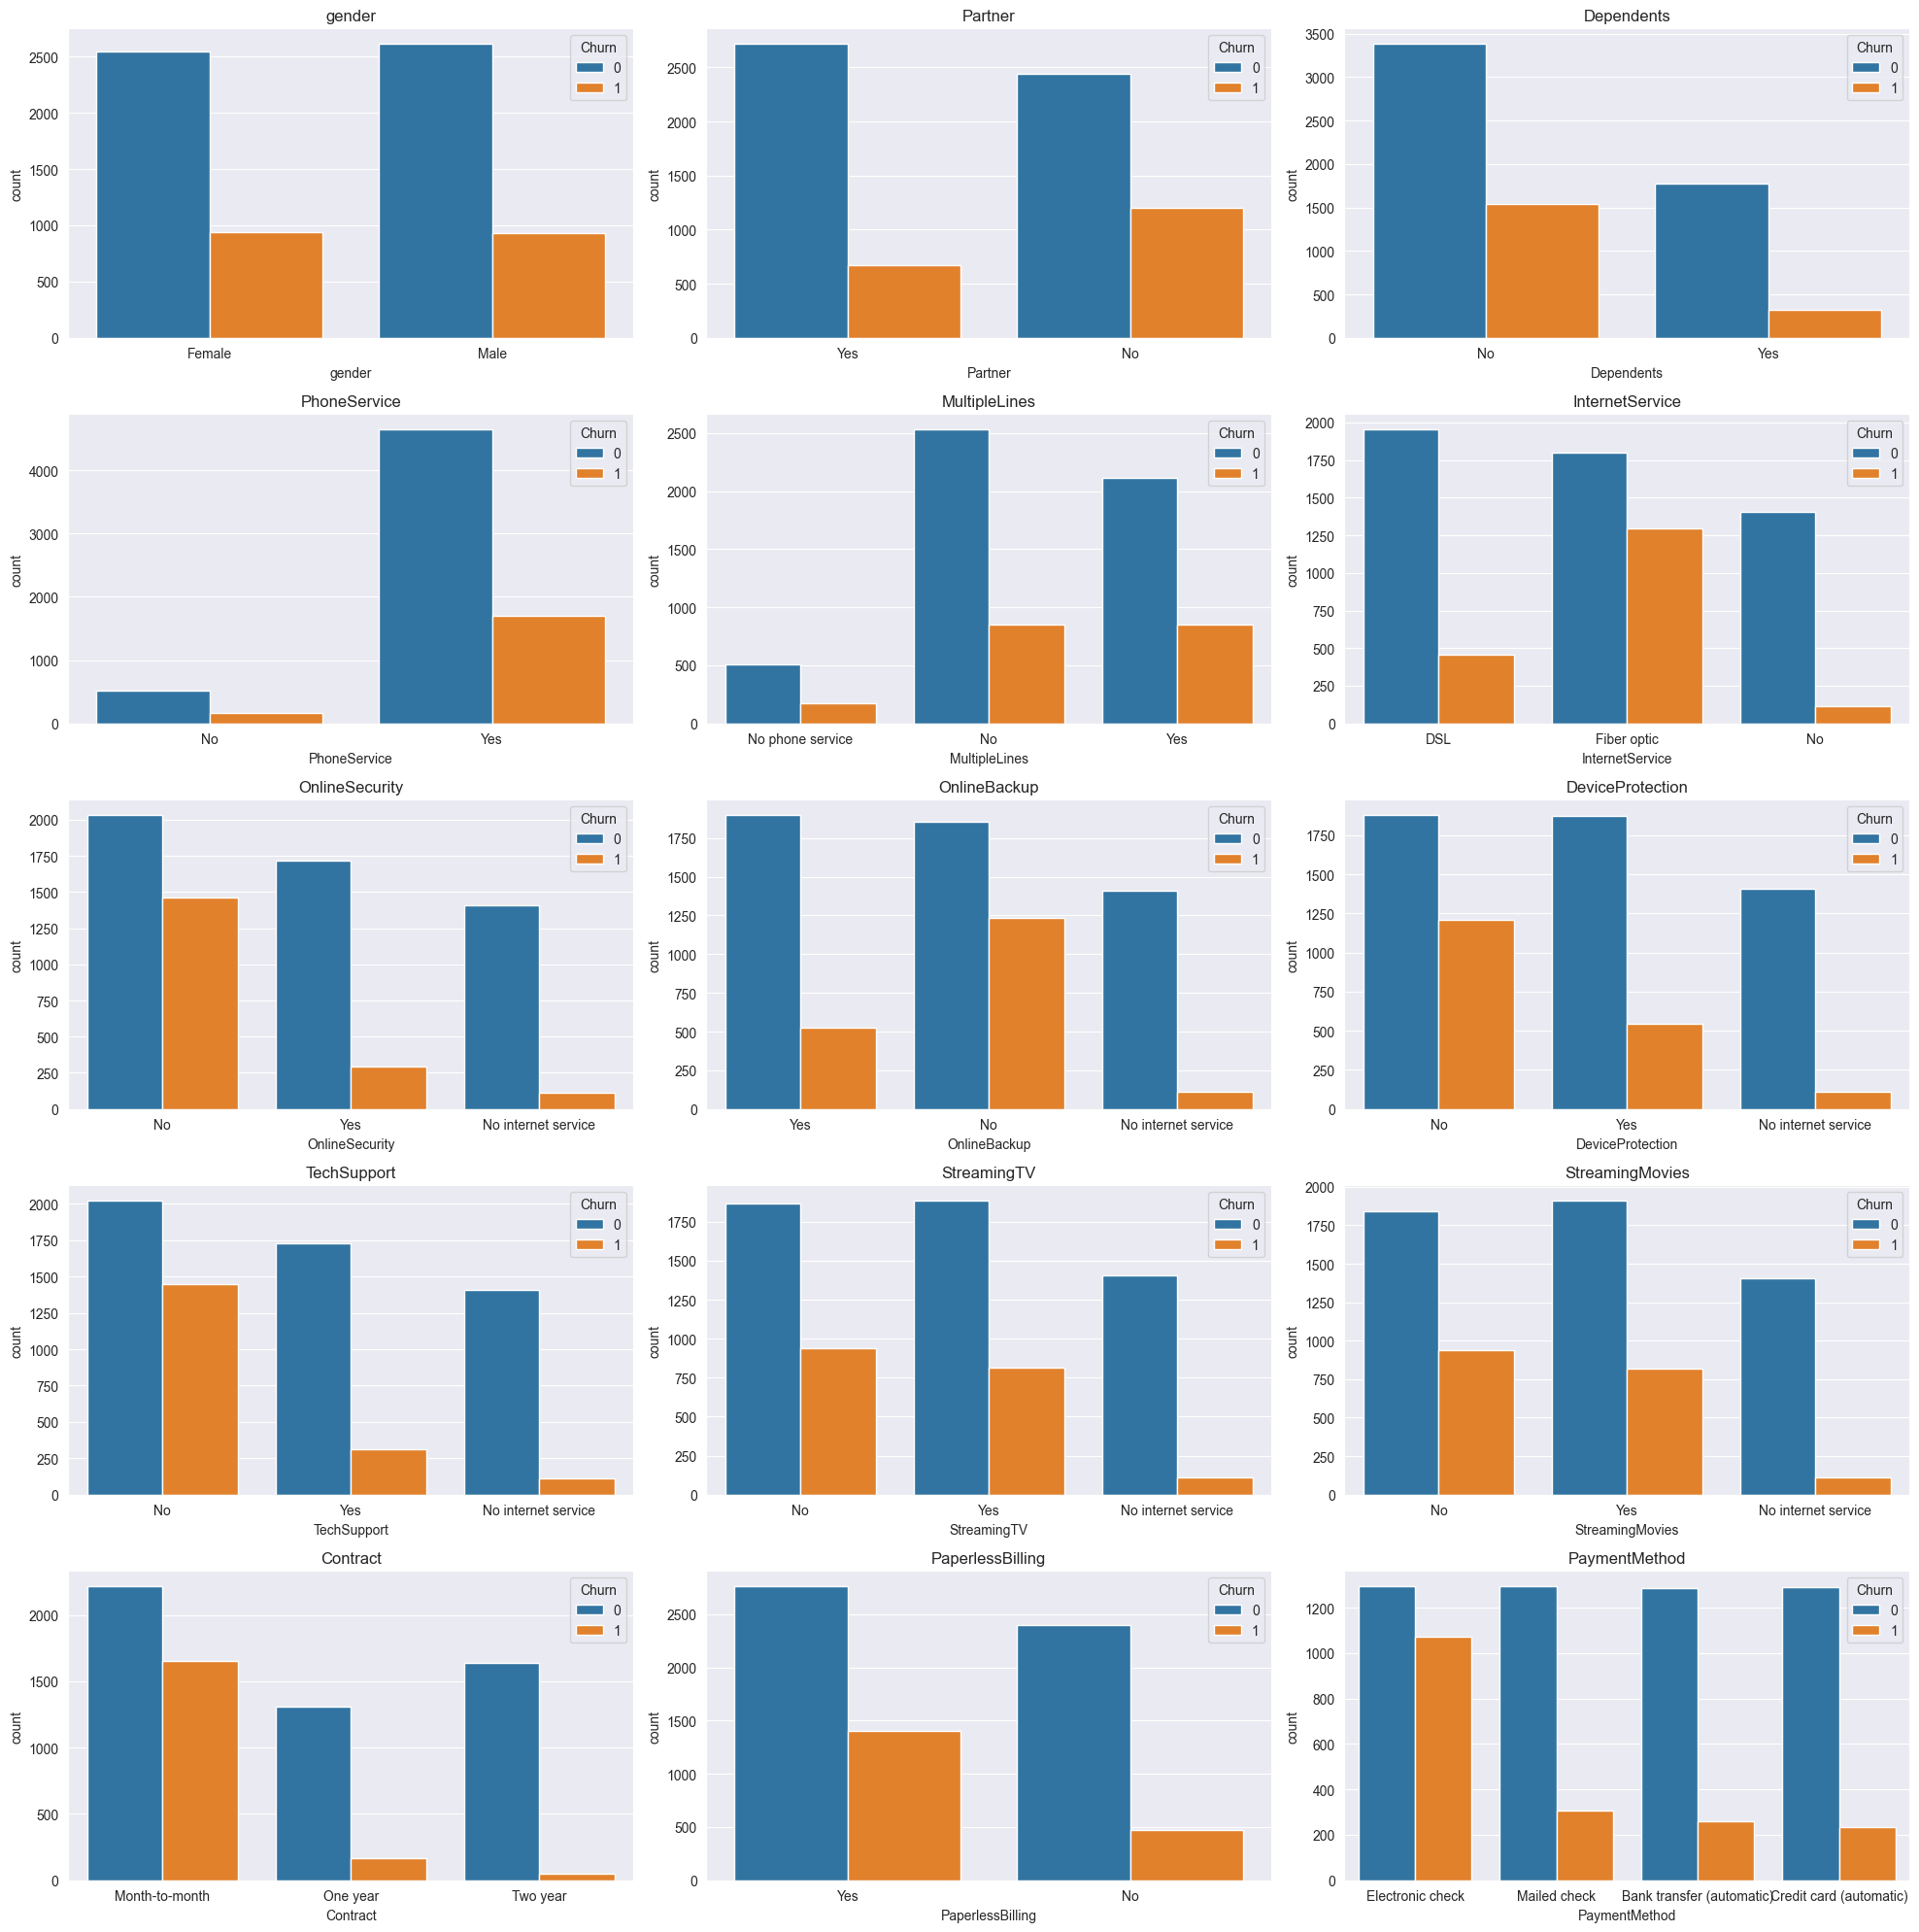

In [19]:
columns_categorical = df_data.select_dtypes(include=['object']).columns

fig, ax = plt.subplots(5, 3, figsize=(20, 20))

for i, col in enumerate(columns_categorical):
    sns.countplot(x=col, data=df_data, ax=ax[i//3][i%3], hue='Churn')
    ax[i//3][i%3].set_title(col)

plt.tight_layout()
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

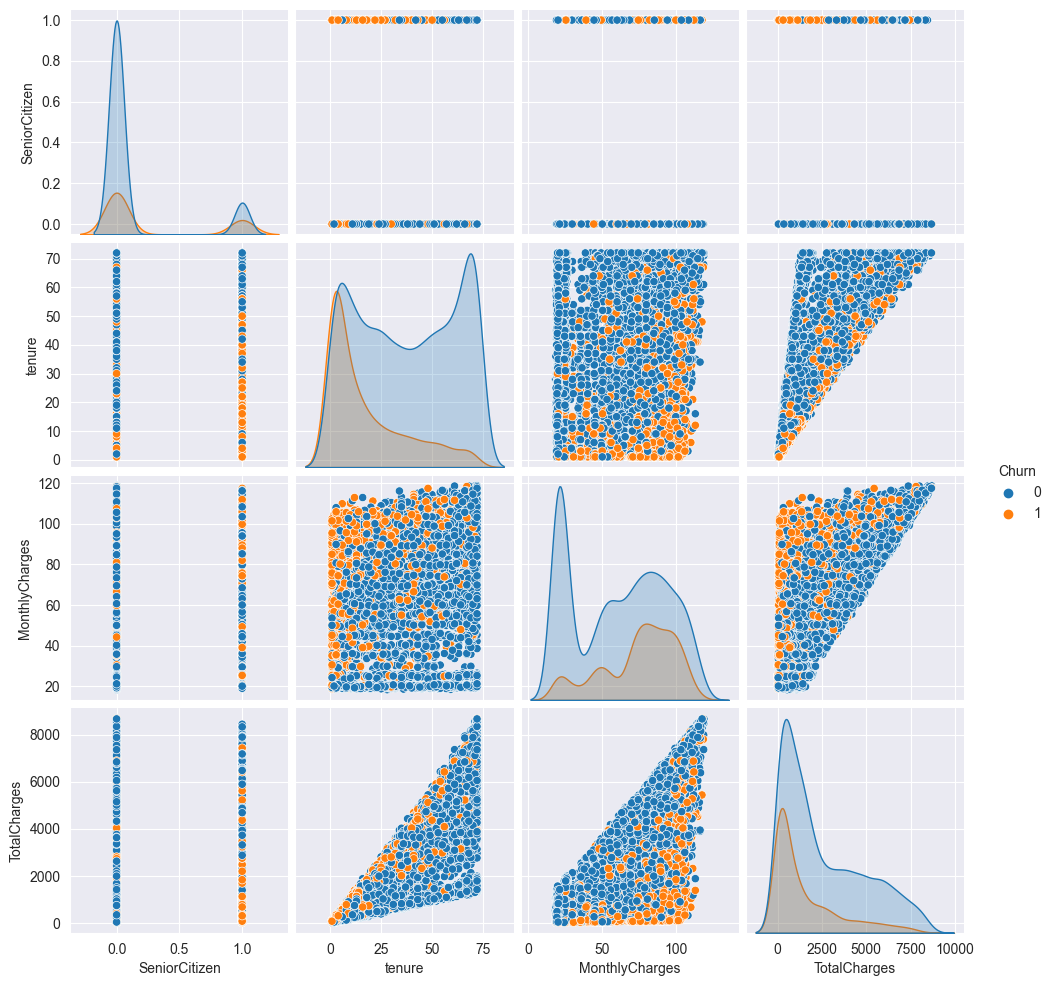

In [20]:
# datos numericos

fig = plt.figure(figsize=(10, 6))

sns.pairplot(data=df_data, hue='Churn')

plt.show()

## Entrenamiento del modelo

In [21]:
X = df_processed_scaled.drop(columns=['Churn'], axis=1)
y = df_processed_scaled['Churn'].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 45), (1407, 45), (5625,), (1407,))

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn import metrics

In [27]:
prediction_test = model.predict(X_test)
print(metrics.classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1033
         1.0       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Evaluacion del modelo

In [28]:
model.predict_proba(X_test)

array([[0.99062063, 0.00937937],
       [0.86457843, 0.13542157],
       [0.30516095, 0.69483905],
       ...,
       [0.89610162, 0.10389838],
       [0.75492432, 0.24507568],
       [0.9961172 , 0.0038828 ]])

In [29]:
model.coef_

array([[ 2.54068863e-01, -3.19523331e+00, -1.98948234e-01,
         1.30427608e+00,  6.27784669e-03, -2.64686085e-02,
        -3.07098320e-02,  1.05190702e-02,  1.02169166e-01,
        -1.22359928e-01,  1.01015291e-01, -1.21206053e-01,
        -1.84057385e-01,  1.01015291e-01,  6.28513325e-02,
        -4.07602736e-01,  4.97285483e-01, -1.09873510e-01,
         2.57972799e-01, -1.09873510e-01, -1.68290052e-01,
         9.13157911e-02, -1.09873510e-01, -1.63304324e-03,
         4.05754673e-02, -1.09873510e-01,  4.91072805e-02,
         2.40222654e-01, -1.09873510e-01, -1.50539906e-01,
        -9.56625011e-02, -1.09873510e-01,  1.85345249e-01,
        -1.04506791e-01, -1.09873510e-01,  1.94189539e-01,
         7.00200577e-01, -8.68950261e-02, -6.33496313e-01,
        -1.45331300e-01,  1.25140539e-01, -3.05529159e-02,
        -1.68296762e-01,  2.40051382e-01, -6.13924660e-02]])

In [30]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

<Axes: >

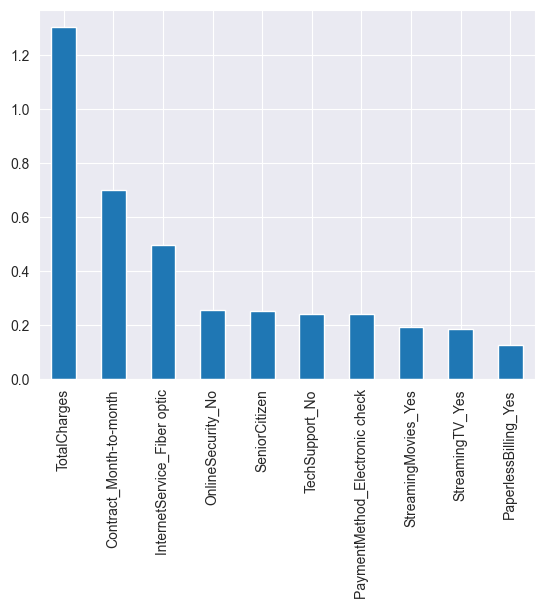

In [32]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')

<Axes: >

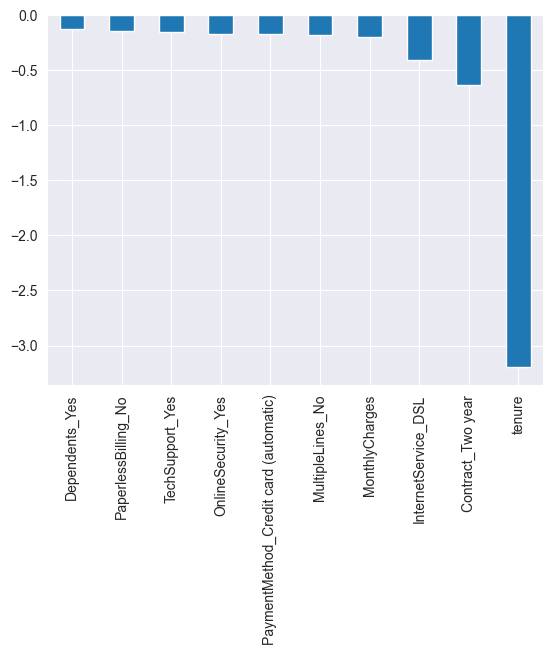

In [33]:
weights.sort_values(ascending = False)[-10:].plot(kind='bar')

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

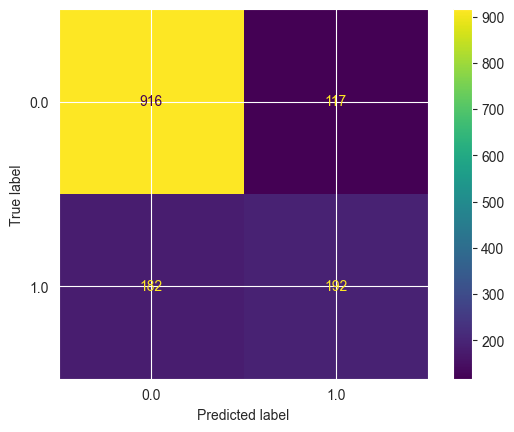

In [39]:
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()